In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [3]:
dataset_path = r"D:\AI\Vehicle_recog_transferlearning\Dataset" 

# Parameters
img_size = 224
batch_size = 16

# Count number of classes
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
print("Class folders found:", class_folders)
num_classes = len(class_folders)
print("Number of classes:", num_classes)


Class folders found: ['.ipynb_checkpoints', 'Bus', 'Car', 'motorcycle', 'Truck']
Number of classes: 5


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze the base


In [9]:
from tensorflow.keras.layers import Dropout

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
history = model.fit(train_gen, validation_data=val_gen, epochs=50)


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


C:\Users\DELL\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 762ms/step - accuracy: 0.4749 - loss: 1.3241 - val_accuracy: 0.7750 - val_loss: 0.7796
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 695ms/step - accuracy: 0.7615 - loss: 0.7749 - val_accuracy: 0.9000 - val_loss: 0.4645
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 694ms/step - accuracy: 0.8736 - loss: 0.5084 - val_accuracy: 0.9625 - val_loss: 0.2958
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - accuracy: 0.8817 - loss: 0.3852 - val_accuracy: 0.9625 - val_loss: 0.2180
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 661ms/step - accuracy: 0.9271 - loss: 0.2832 - val_accuracy: 0.9625 - val_loss: 0.1659
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - accuracy: 0.9796 - loss: 0.1792 - val_accuracy: 0.9625 - val_loss: 0.1417
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 661ms/step - accuracy: 0.9326 - loss: 0.2295 - val_accuracy: 0.9625 - val_loss: 0.1252
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 662ms/step - accuracy: 0.9862 - loss: 0.1318 - val_accuracy: 0.975

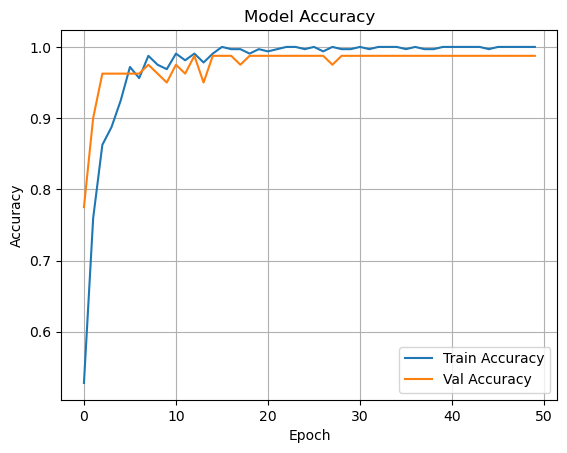

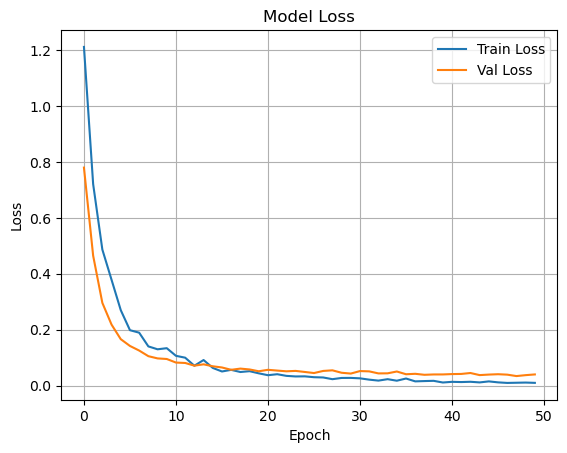

In [15]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


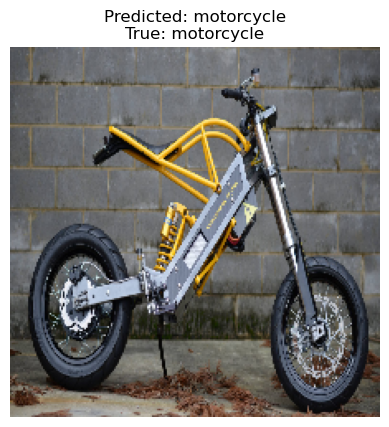

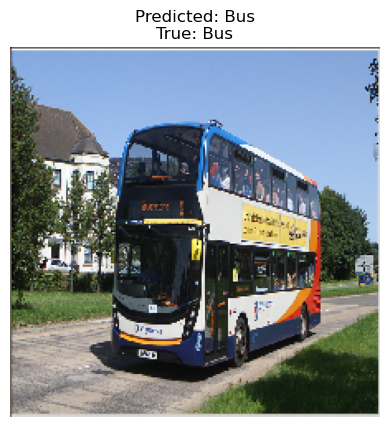

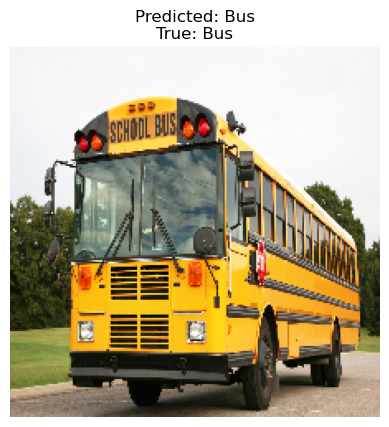

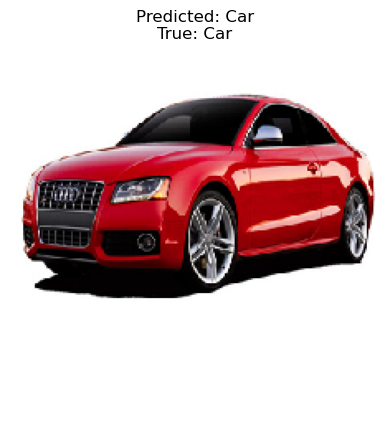

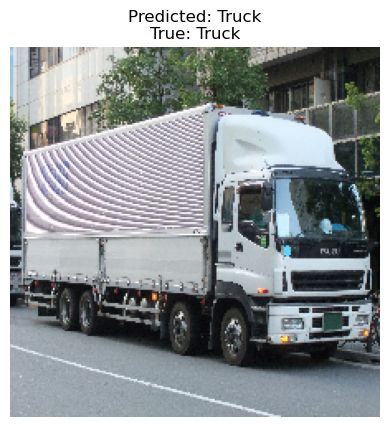

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Get class names from the generator (mapping class index to class name)
class_indices = val_gen.class_indices  # dict: {class_name: index}
# Reverse mapping: index -> class_name
index_to_class = {v: k for k, v in class_indices.items()}

# Get a batch of images and labels from validation generator
images, labels = next(val_gen)  # gets one batch

# Predict on the batch
predictions = model.predict(images)

# Plot first 5 images with predicted and true labels
for i in range(5):
    plt.imshow(images[i])
    
    pred_class_index = np.argmax(predictions[i])
    pred_class_name = index_to_class[pred_class_index]
    
    true_class_index = np.argmax(labels[i])
    true_class_name = index_to_class[true_class_index]
    
    plt.title(f"Predicted: {pred_class_name}\nTrue: {true_class_name}")
    plt.axis('off')
    plt.show()


In [21]:
model.save('vehicle_recognition_model_.h5')